<h1 style="color: red;"><center>La visualisation et La détection des maladies cardiovasculaires a l'aide de l'apprentissage automatique</center></h1>

<h2 style="color: green;"><center>1-chargé les bibliothéque nécessaires</center><h2>

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1 style="color: red;"><center>EXPLORATION ET ANALYSE DES DONNEES

<h2 style="color: green;"> l'importation des données sur kaggle framingham.csv

In [ ]:
df=pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# New Section

# New Section

# La méthode describe() affiche des calcules statistique

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


<h2>A partir de méthode duplicated() on peut vérifier si il ya des lignes dupplicé sur notre data

In [ ]:
df.duplicated().sum()

0

<h2>La visualisation des valeurs manquantes pour chaque variable sur le dataset

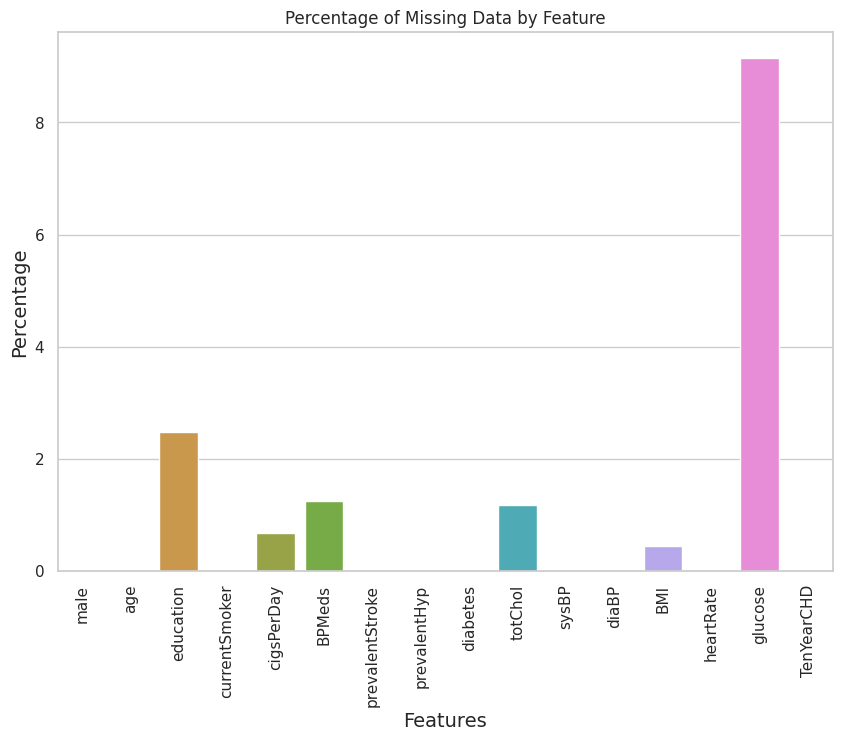

In [ ]:
plt.figure(figsize=(10, 7))
missing_data=df.isnull().sum()
missing_data = missing_data.to_frame(name='Total')
missing_data['Percentage'] = (missing_data['Total'] / len(df)) * 100
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)
plt.show()

<H3>Person correlation qui décrire la relation entre chaque deux variables

In [ ]:
correlation=df.corr()

<Axes: >

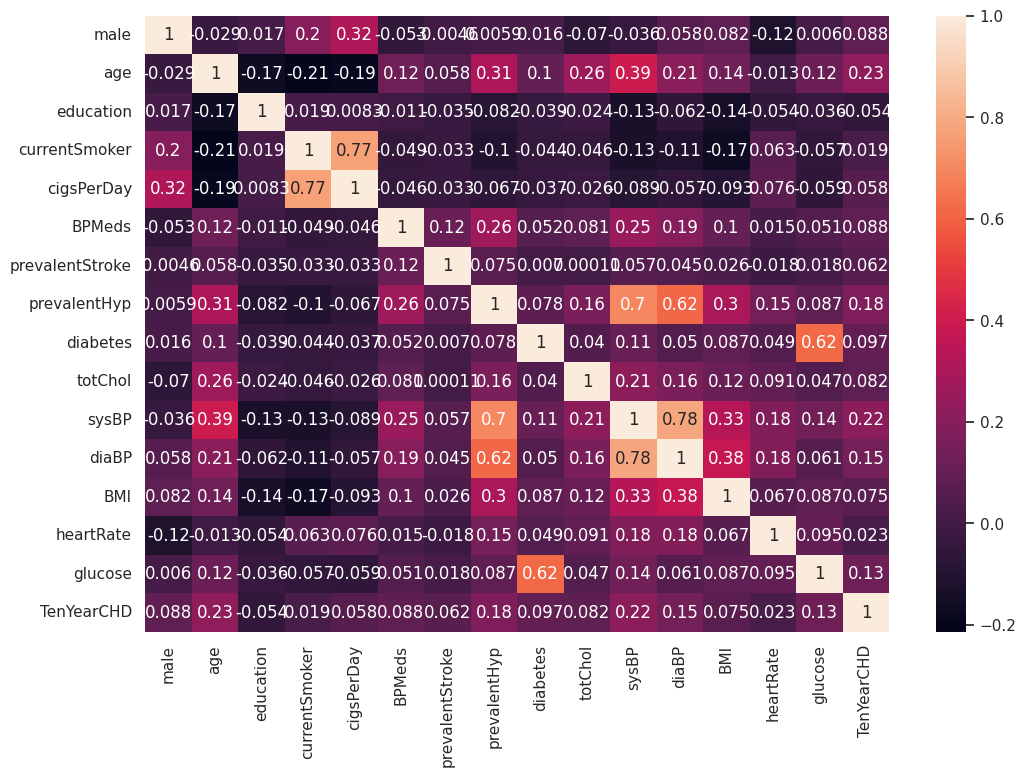

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True)

<h2 style="color: green;">je divise la data sur deux catégorie quantitative pour appliquée des méthodes statistique avec et autre catégorie qualitative pour virifier l'équilibrage des données

In [ ]:
colonnes_a_supprimer = ["male", "education", "currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes","TenYearCHD"]
data= df.drop(columns=colonnes_a_supprimer)

In [ ]:
dataC=df[colonnes_a_supprimer]
dataC

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,4.0,0,0.0,0,0,0,0
1,0,2.0,0,0.0,0,0,0,0
2,1,1.0,1,0.0,0,0,0,0
3,0,3.0,1,0.0,0,1,0,1
4,0,3.0,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
4235,0,2.0,1,NaN,0,0,0,0
4236,0,1.0,1,0.0,0,0,0,0
4237,0,2.0,0,0.0,0,0,0,0
4238,1,3.0,0,0.0,0,1,0,0


In [ ]:
data.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


<h2>des histogrames montre les skeness et les kurtosis chez les variables quantitative

age


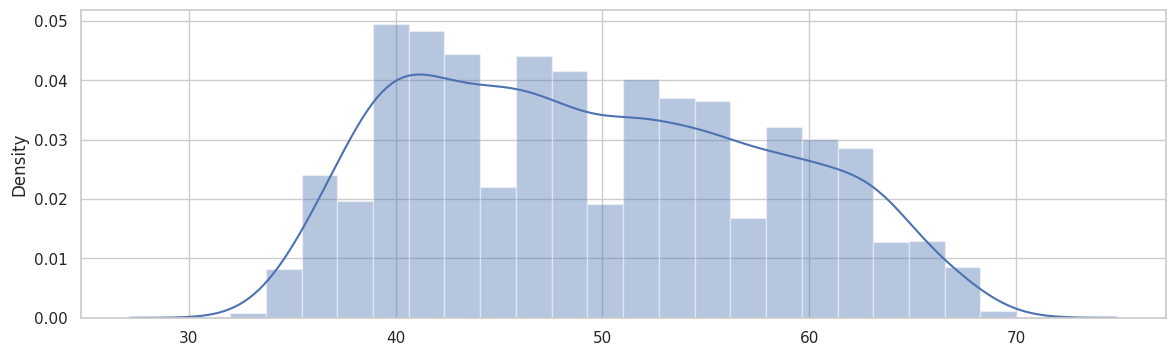

cigsPerDay


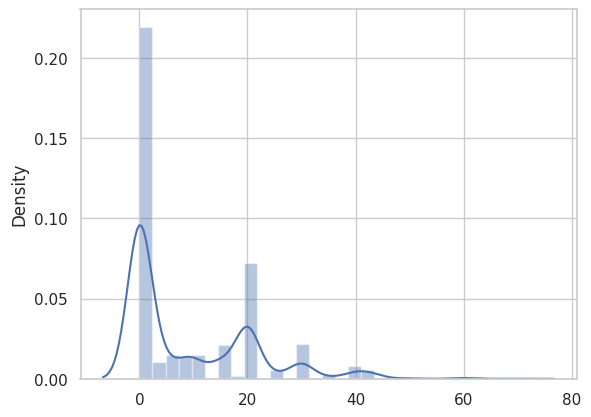

totChol


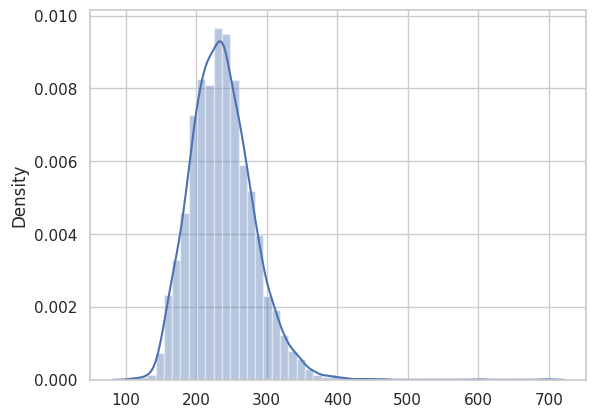

sysBP


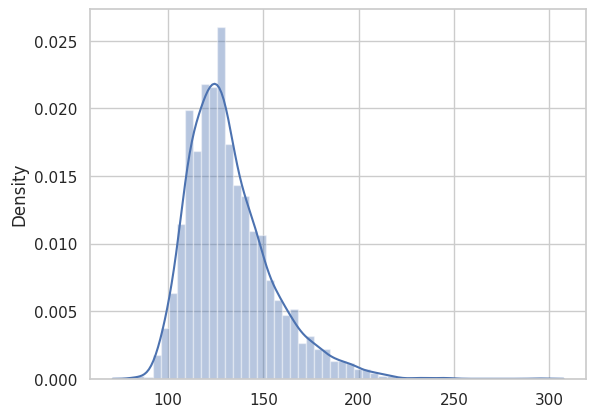

diaBP


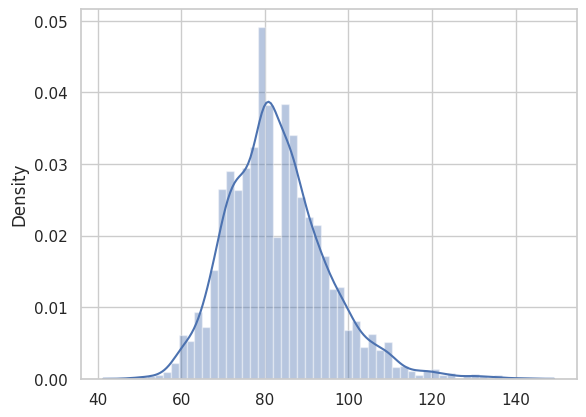

BMI


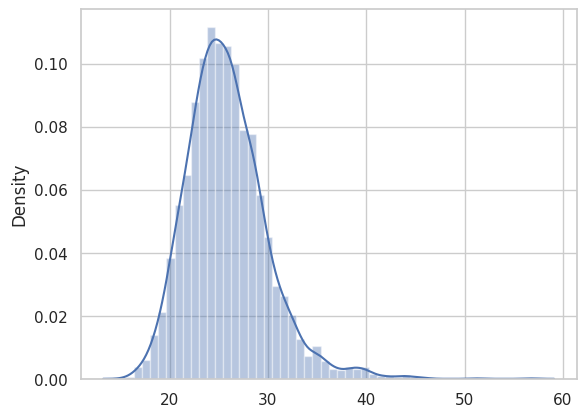

heartRate


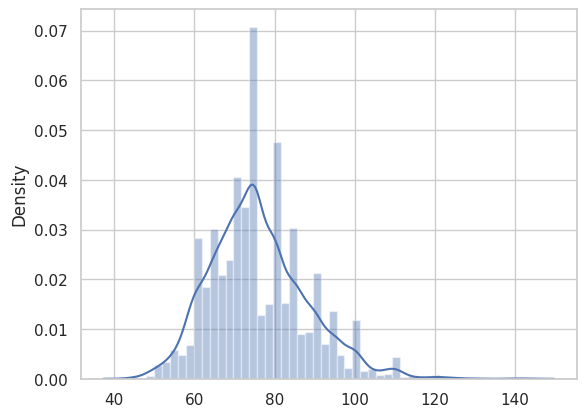

glucose


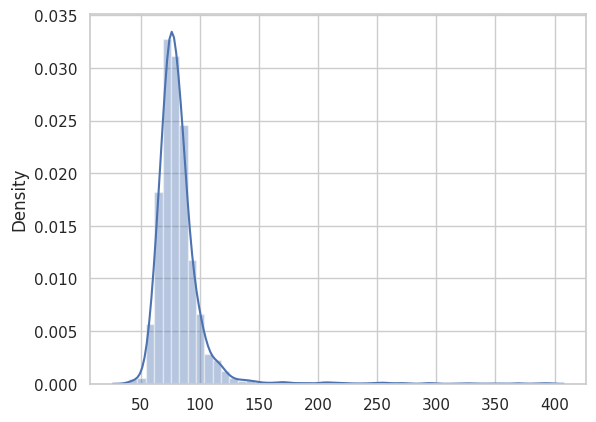

In [ ]:
plt.figure(figsize=(14,4))
for i in data:
    print(i)
    sns.distplot(x=data[i])
    plt.show()


<h2>montre l'équilibrage entre les catégories de chaque variables

male


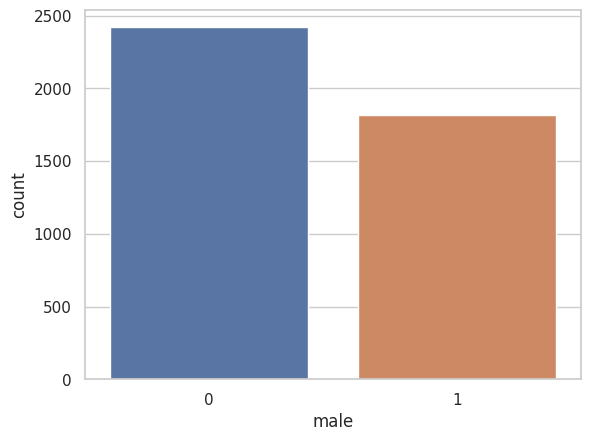

education


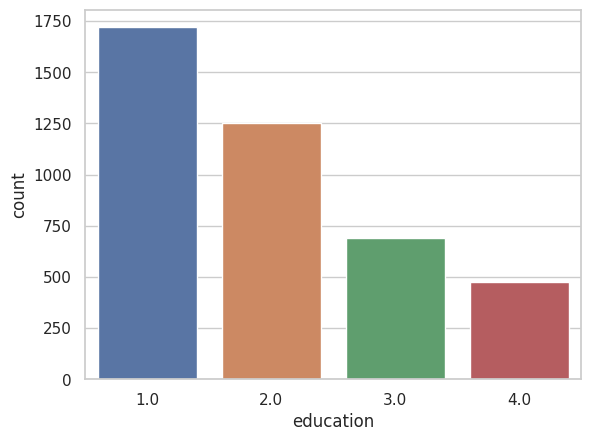

currentSmoker


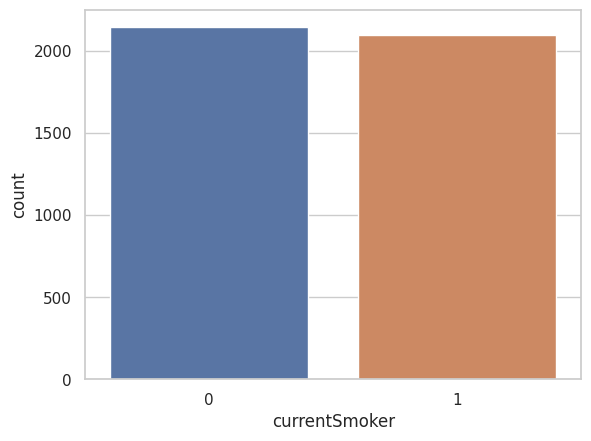

BPMeds


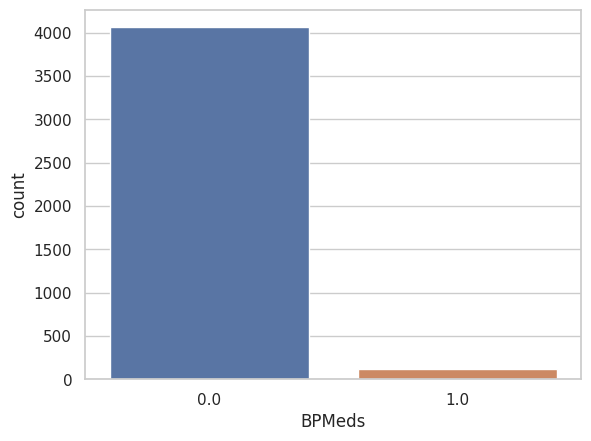

prevalentStroke


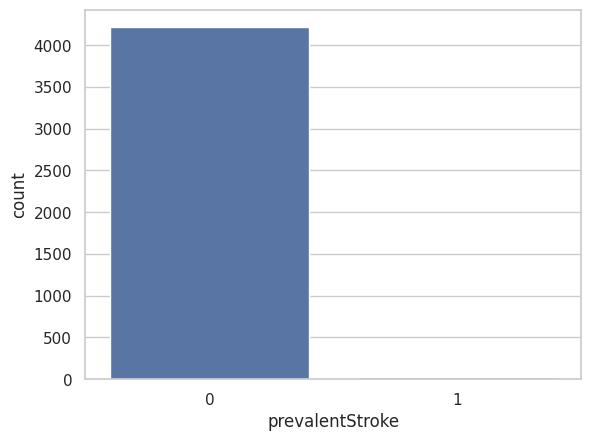

prevalentHyp


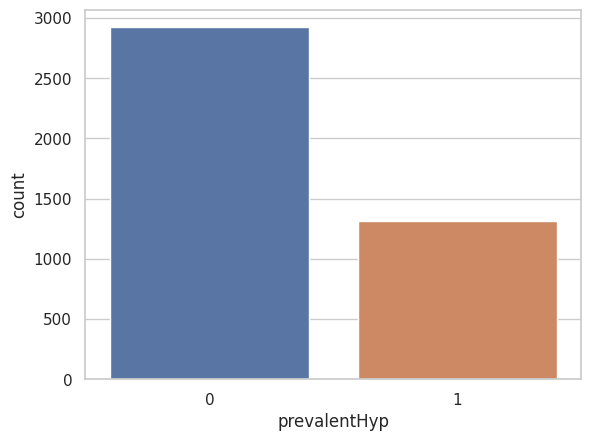

diabetes


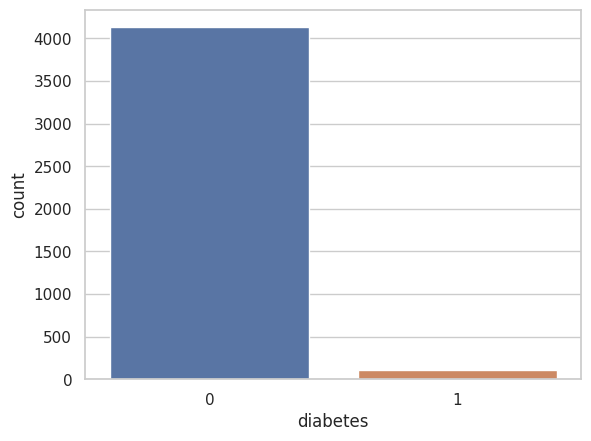

TenYearCHD


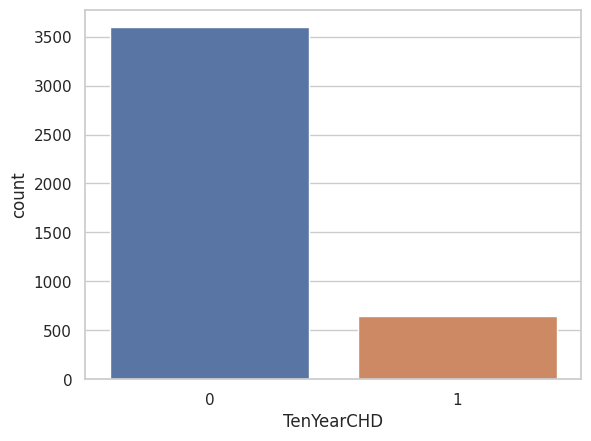

In [ ]:
for i in colonnes_a_supprimer:
    print(i)
    sns.countplot(x=dataC[i],data=dataC)
    plt.show()

<h2>montre les outliers sur le boxplot

les valeurs maximale est : age            77.000
cigsPerDay     50.000
totChol       348.500
sysBP         184.500
diaBP         112.500
BMI            35.495
heartRate     105.500
glucose       111.000
dtype: float64
les valeurs minimale est : age            21.000
cigsPerDay    -30.000
totChol       120.500
sysBP          76.500
diaBP          52.500
BMI            15.615
heartRate      45.500
glucose        47.000
dtype: float64


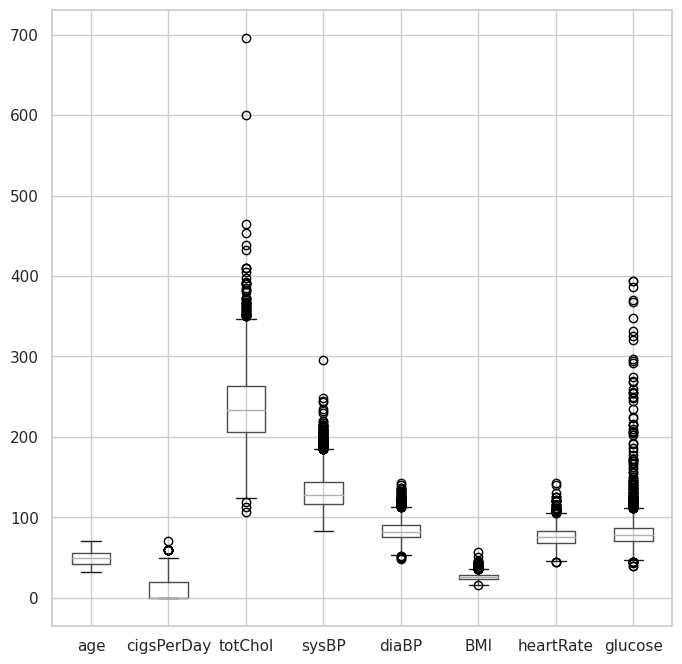

In [ ]:
plt.figure(figsize=(8,8))
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
qsup=1.5*IQR+Q3
qinf=Q1-1.5*IQR
data.boxplot()
print("les valeurs maximale est :",qsup)
print("les valeurs minimale est :",qinf)

<h2>nombre des maladies par catégorie d'age

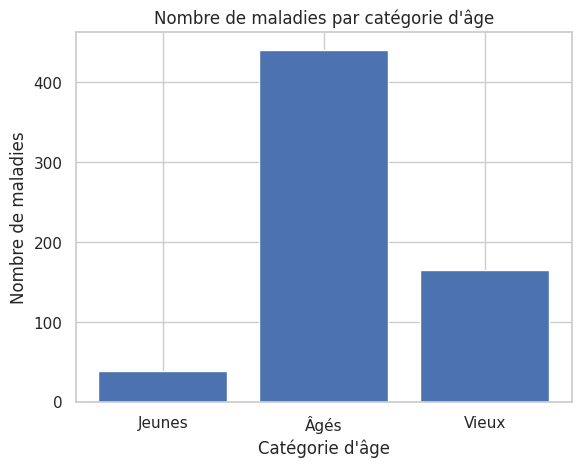

In [ ]:
tranches_age = df['age']
nombre_maladies = df['TenYearCHD']
cut_bins = [0, 40, 60, float('inf')]
cut_labels = ['Jeunes', 'Âgés', 'Vieux']
tranches_age_cat = pd.cut(tranches_age, bins=cut_bins, labels=cut_labels)
grouped_df = pd.DataFrame({'Tranches d\'âge': tranches_age_cat, 'Nombre de maladies': nombre_maladies})
grouped_df = grouped_df.groupby('Tranches d\'âge')['Nombre de maladies'].sum().reset_index()
plt.bar(grouped_df['Tranches d\'âge'], grouped_df['Nombre de maladies'])
plt.title('Nombre de maladies par catégorie d\'âge')
plt.xlabel('Catégorie d\'âge')
plt.ylabel('Nombre de maladies')
plt.show()

<h2>La répartition des maladies par tranche d'age

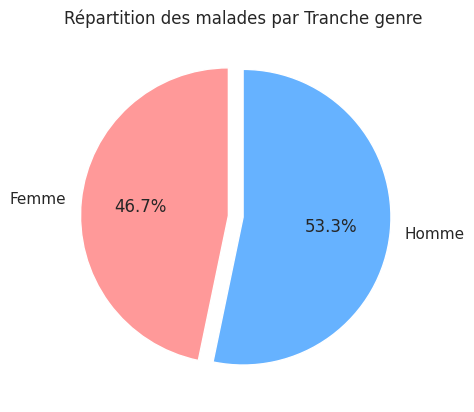

In [ ]:
gender = df['male']
nombre_maladies = df['TenYearCHD']
gender_categories = {0: 'Femme', 1: 'Homme'}
gender = gender.map(gender_categories)
grouped_df = pd.DataFrame({'Genre': gender, 'Nombre de maladies': nombre_maladies})
grouped_df = grouped_df.groupby('Genre')['Nombre de maladies'].sum().reset_index()
colors = ['#FF9999', '#66B2FF']
explode = (0.1, 0)
plt.pie(grouped_df['Nombre de maladies'], labels=grouped_df['Genre'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Répartition des malades par Tranche genre')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


<Axes: ylabel='TenYearCHD'>

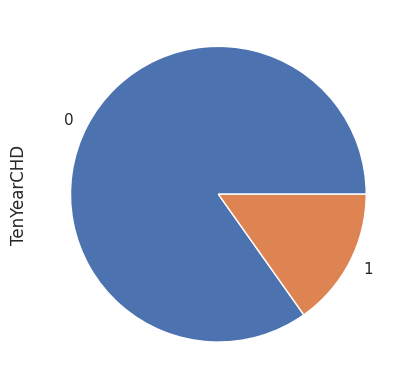

In [ ]:
df['TenYearCHD'].value_counts().plot.pie()

<h1><center>Prétraitement

<h3>1-fixer les outliers

<Axes: >

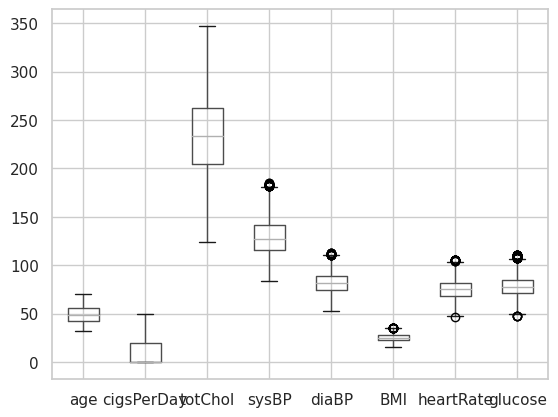

In [ ]:
dm=data[(data >= qinf) & (data <= qsup)]
dm.boxplot()

In [ ]:
dm.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


<h2>2-rassembler les variables quantitative et qualitative

In [ ]:
merged_df = pd.merge(dm, dataC, left_on='age', right_on='male', how='outer')
merged_df

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39.0,9.0,226.0,114.0,64.0,22.35,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.0,20.0,209.0,115.0,75.0,22.54,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39.0,0.0,285.0,155.0,110.0,32.51,84.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39.0,15.0,256.0,132.5,80.0,24.80,75.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
8476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,0.0,0.0,0.0,0.0
8477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='TenYearCHD'>

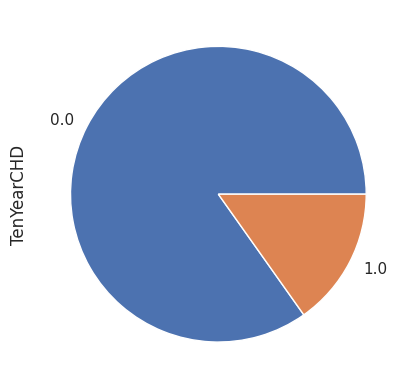

In [ ]:
merged_df['TenYearCHD'].value_counts().plot.pie()

<h3>3-différencer entre le target et les features

In [ ]:
Y=merged_df['TenYearCHD']
X=merged_df.drop(columns=['TenYearCHD'],axis=0)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=2)
dX_imputed = knn_imputer.fit_transform(X)
dX_imputed

array([[3.90000000e+01, 0.00000000e+00, 1.95000000e+02, ...,
        5.89622642e-03, 3.10613208e-01, 2.57075472e-02],
       [3.90000000e+01, 9.00000000e+00, 2.26000000e+02, ...,
        5.89622642e-03, 3.10613208e-01, 2.57075472e-02],
       [3.90000000e+01, 2.00000000e+01, 2.09000000e+02, ...,
        5.89622642e-03, 3.10613208e-01, 2.57075472e-02],
       ...,
       [4.95801887e+01, 8.85782329e+00, 2.34871311e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.95801887e+01, 8.85782329e+00, 2.34871311e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.95801887e+01, 8.85782329e+00, 2.34871311e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
x_imputation=pd.DataFrame(dX_imputed)
x_imputation.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [ ]:
dY_imputed = knn_imputer.fit_transform(Y.values.reshape(-1, 1))
dY_imputed

array([[0.15188679],
       [0.15188679],
       [0.15188679],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
scaler = RobustScaler()
scaled_X = scaler.fit_transform(dX_imputed)
scaled_Y = scaler.fit_transform(dY_imputed.reshape(-1, 1))
scaled_X

array([[-1.82357724e+01, -1.00000000e+00, -2.13066184e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.82357724e+01,  1.60509760e-02, -4.74069286e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.82357724e+01,  1.25789106e+00, -1.38252327e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00]])

In [ ]:
threshold = 0.5
dY_imputed_categorical = np.where(scaled_Y > threshold, 1, 0)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(scaled_X, dY_imputed_categorical)

In [ ]:
y_resampled

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from collections import Counter
print(Counter(y_resampled))

Counter({0: 7836, 1: 7836})


In [ ]:
from collections import Counter
class_distribution = Counter(y_resampled)
print(class_distribution)

Counter({0: 7836, 1: 7836})


In [ ]:
c=0
p=0
for i in y_resampled:
    if i==1:
        c=c+1
    else:
        p=p+1
print(c)
print(p)

7836
7836


<h3>7-on diviser notre dataset par la partie training(80) et testing(20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

<h2><center>le première modèle c'est logistique regression

dans cette partie j'utilise aussi le cross validation dans cette partie je divise la data par 5 partie pour avoir
une idée compléte sur le meilleurs accuracy tous en sachant que il ya d'autre métrice qu'on doit prendre en consédiration comme
la matrix de confusion et le recall

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Matrice de Confusion :")
print(conf_matrix)
accuracy = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())

Accuracy: 0.7065390749601276
Recall: 0.5860113421550095
Matrice de Confusion :
[[1285  263]
 [ 657  930]]
Cross-validated Accuracy: 0.5652715242303123
Cross-validated Recall: 0.6125598276962348


In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))
print(classification_report(y_test, y_pred, labels=[1, 2]))

              precision    recall  f1-score   support

     class 0       0.66      0.83      0.74      1548
     class 1       0.78      0.59      0.67      1587

    accuracy                           0.71      3135
   macro avg       0.72      0.71      0.70      3135
weighted avg       0.72      0.71      0.70      3135

              precision    recall  f1-score   support

           1       0.78      0.59      0.67      1587
           2       0.00      0.00      0.00         0

   micro avg       0.78      0.59      0.67      1587
   macro avg       0.39      0.29      0.33      1587
weighted avg       0.78      0.59      0.67      1587



maintenant ce que je fait j'ai utlise le modèle de logistique de regression mais avec l'optimisation
des paramétre par le gridserach

In [ ]:
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(model, hyperparameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres : ", grid_search.best_params_)
print("Meilleure performance : ", grid_search.best_score_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle final : ", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
accuracy = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(best_model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())

Meilleurs hyperparamètres :  {'C': 1, 'penalty': 'l2'}
Meilleure performance :  0.7122911350610635
Exactitude du modèle final :  0.7065390749601276
Recall: 0.5860113421550095
Cross-validated Accuracy: 0.5652715242303123
Cross-validated Recall: 0.6125598276962348


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Train the classifier and make predictions on the test set
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall * 100))
# Print the number of mislabeled points
print("Number of mislabeled points out of a total %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Accuracy: 77.19%
Recall: 100.00%
Number of mislabeled points out of a total 3135 points: 715


<h2><center>decision tree model

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
accuracy = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(model, X_train, y_train, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())

Accuracy: 0.7933014354066986
Recall: 0.9395085066162571
Cross-validated Accuracy: 0.7471680768318661
Cross-validated Recall: 0.9483118014411529


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres trouvés:")
print(grid_search.best_params_)
print("Meilleure performance trouvée:")
print(grid_search.best_score_)
accuracy = grid_search.score(X_test, y_test)
print("Exactitude du modèle final:")
print(accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
accuracy = cross_val_score(grid_search, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(grid_search, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())

Meilleurs hyperparamètres trouvés:
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Meilleure performance trouvée:
0.7877476399414972
Exactitude du modèle final:
0.7933014354066986
Recall: 0.9395085066162571
Cross-validated Accuracy: 0.7371488505448806
Cross-validated Recall: 0.9078632314444605


<h2><center>Xgboost model

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)
accuracy = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())

Accuracy: 0.7942583732057417
Recall: 0.9420289855072463
Cross-validated Accuracy: 0.7464658746128533
Cross-validated Recall: 0.9088834768112732


In [ ]:
classifier = XGBClassifier()
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)
print("Meilleure performance trouvée :")
print(grid_search.best_score_)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
accuracy = cross_val_score(grid_search, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(grid_search, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())

Meilleurs hyperparamètres trouvés :
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Meilleure performance trouvée :
0.7885452471516754
Accuracy: 0.7942583732057417
Recall: 0.9420289855072463
Cross-validated Accuracy: 0.7379779523648129
Cross-validated Recall: 0.9124571845330347


<h2><center>Adaboost model

In [ ]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)
accuracy = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())

Accuracy: 0.7783094098883573
Recall: 0.9105229993698802
Cross-validated Accuracy: 0.7367666046825017
Cross-validated Recall: 0.9212635772241251


In [ ]:
classifier = AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters found:")
print(grid_search.best_params_)
print("Best performance found:")
print(grid_search.best_score_)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
accuracy = cross_val_score(grid_search, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(grid_search, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())

Best hyperparameters found:
{'learning_rate': 1.0, 'n_estimators': 200}
Best performance found:
0.7804890485269634
Accuracy: 0.7783094098883573
Recall: 0.9105229993698802
Cross-validated Accuracy: 0.7382966670025415
Cross-validated Recall: 0.9355584081111704


<h2><center>RandomForest model

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = cross_val_score(rf_classifier, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(rf_classifier, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Cross-validated Accuracy: 0.7463383439744572
Cross-validated Recall: 0.9070971113397498
Accuracy: 0.7942583732057417
Recall: 0.9426591052299937


In [ ]:
rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Meilleurs paramètres: {best_params}")
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
accuracy = cross_val_score(grid_search, X_resampled, y_resampled, scoring=make_scorer(accuracy_score), cv=5)
print("Cross-validated Accuracy:", accuracy.mean())
recall = cross_val_score(grid_search, X_resampled, y_resampled, scoring=make_scorer(recall_score), cv=5)
print("Cross-validated Recall:", recall.mean())